# Importing the Libraries

In [4]:
import glob
import cv2
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report

####Convert to Code , when needed 
##
pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/cu111/torch_stable.html

## We load the data with glob



In [5]:
fire_folder  = r"fire_dataset\fire_images/*.png"
non_fire_folder = r"fire_dataset\non_fire_images/*.png"

In [6]:
lst_fire_img = glob.glob(fire_folder)
lst_non_fire_img = glob.glob(non_fire_folder)

In [7]:
lst_non_fire_img

['fire_dataset\\non_fire_images\\non_fire.1.png',
 'fire_dataset\\non_fire_images\\non_fire.10.png',
 'fire_dataset\\non_fire_images\\non_fire.100.png',
 'fire_dataset\\non_fire_images\\non_fire.101.png',
 'fire_dataset\\non_fire_images\\non_fire.102.png',
 'fire_dataset\\non_fire_images\\non_fire.103.png',
 'fire_dataset\\non_fire_images\\non_fire.104.png',
 'fire_dataset\\non_fire_images\\non_fire.105.png',
 'fire_dataset\\non_fire_images\\non_fire.106.png',
 'fire_dataset\\non_fire_images\\non_fire.107.png',
 'fire_dataset\\non_fire_images\\non_fire.108.png',
 'fire_dataset\\non_fire_images\\non_fire.109.png',
 'fire_dataset\\non_fire_images\\non_fire.11.png',
 'fire_dataset\\non_fire_images\\non_fire.110.png',
 'fire_dataset\\non_fire_images\\non_fire.111.png',
 'fire_dataset\\non_fire_images\\non_fire.112.png',
 'fire_dataset\\non_fire_images\\non_fire.113.png',
 'fire_dataset\\non_fire_images\\non_fire.114.png',
 'fire_dataset\\non_fire_images\\non_fire.115.png',
 'fire_dataset\\

In [8]:
print('Number of images with fire : {}'.format(len(lst_fire_img)))
print('Number of images with fire : {}'.format(len(lst_non_fire_img)))

Number of images with fire : 755
Number of images with fire : 243


#### We plot 20 images to see how are the data



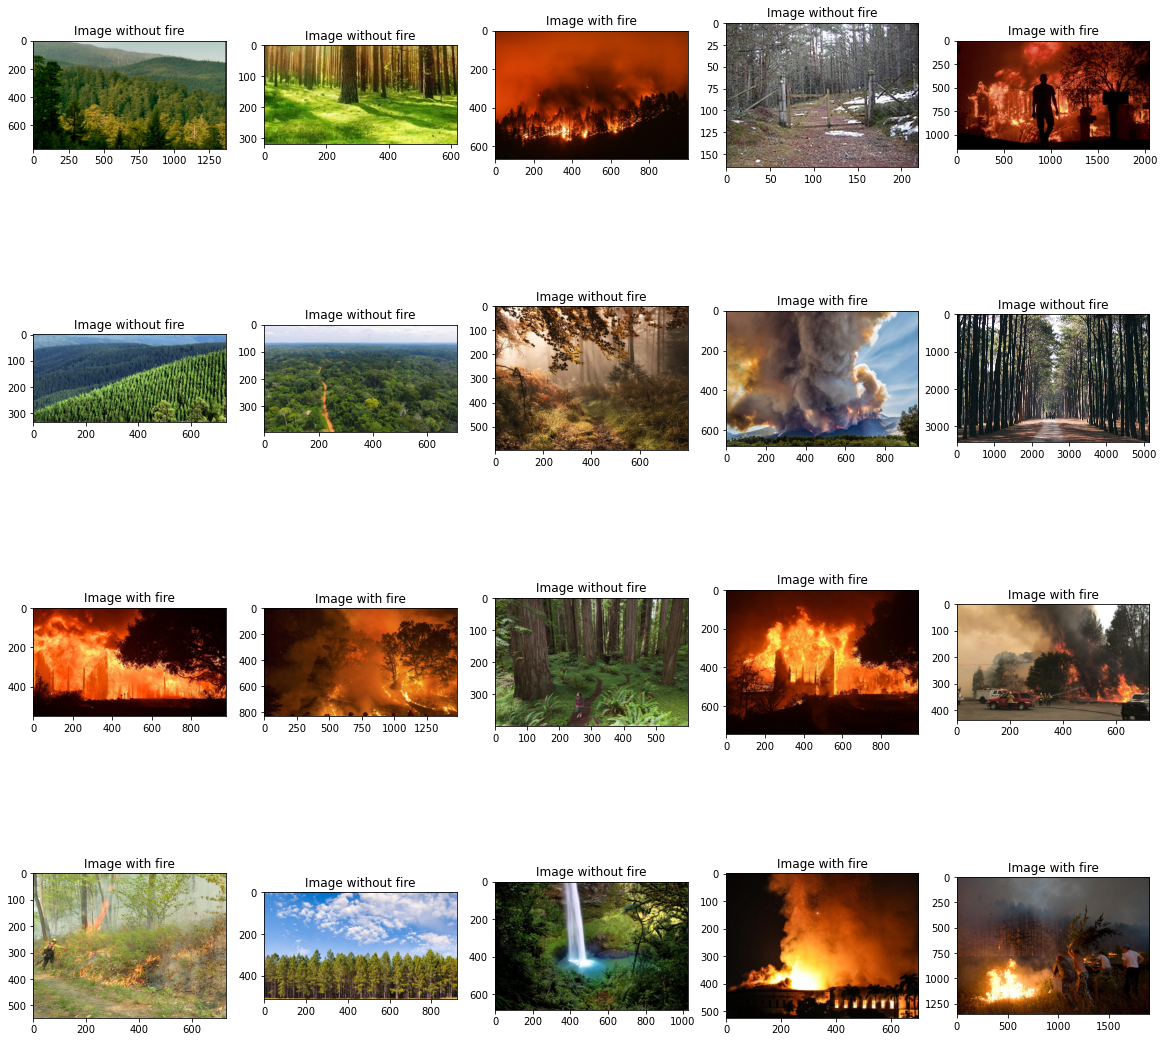

In [9]:
lst_images_random = random.sample(lst_fire_img,10) + random.sample(lst_non_fire_img,10)
random.shuffle(lst_images_random)

plt.figure(figsize = (20,20))

for i in range(len(lst_images_random)):
    
    plt.subplot(4,5,i+1)


    if "non_fire" in lst_images_random[i]:
        img = cv2.imread(lst_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title('Image without fire')

    else:
        img = cv2.imread(lst_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title("Image with fire")



plt.show()

### We create a dataframe with filepath images and label (1 = fire , 0 = without fire)



In [10]:
lst_fire = []
for x in lst_fire_img:
  lst_fire.append([x,1])
lst_nn_fire = []
for x in lst_non_fire_img:
  lst_nn_fire.append([x,0])
lst_complete = lst_fire + lst_nn_fire
random.shuffle(lst_complete)

In [11]:
df = pd.DataFrame(lst_complete,columns = ['files','target'])
df.head(10)

,files,target
0,fire_dataset\fire_images\fire.649.png,1
1,fire_dataset\fire_images\fire.718.png,1
2,fire_dataset\non_fire_images\non_fire.72.png,0
3,fire_dataset\fire_images\fire.441.png,1
4,fire_dataset\fire_images\fire.594.png,1
5,fire_dataset\fire_images\fire.477.png,1
6,fire_dataset\non_fire_images\non_fire.143.png,0
7,fire_dataset\non_fire_images\non_fire.51.png,0
8,fire_dataset\non_fire_images\non_fire.39.png,0
9,fire_dataset\fire_images\fire.498.png,1


In [12]:
df.shape

(998, 2)

### Although we can see that the dataset is uneven, we do not utilise ImageDataGenerator because the results are still quite decent.


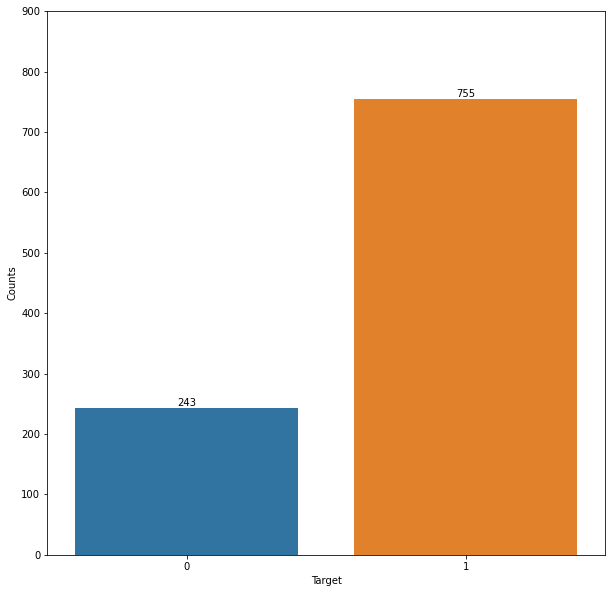

In [13]:
fig = plt.figure(figsize=(10,10)) 
plt.ylim(0,900)
ax = sns.countplot(x=df['target'])

plt.xlabel('Target')
plt.ylabel('Counts')


# Annotating the bar graph
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.show()

#### We preprocess all the images



In [14]:
def preprocessing_image(filepath):
  img = cv2.imread(filepath) #read
  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR) #convert
  img = cv2.resize(img,(196,196))  # resize
  img = img / 255 #scale
  return img 

#### We create numpy array X and y . X are 998 images with (196,196,3) shape, y the target is (998,) shape

In [15]:
def create_format_dataset(dataframe):
  X = []
  y = []
  for f,t in dataframe.values:
    X.append(preprocessing_image(f))
    y.append(t)
  
  return np.array(X),np.array(y)

In [16]:
X, y = create_format_dataset(df)

In [17]:
X.shape,y.shape

((998, 196, 196, 3), (998,))

### we split the data in train and test


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y)

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((698, 196, 196, 3), (300, 196, 196, 3), (698,), (300,))

In [20]:
model = Sequential()

model.add(Conv2D(128,(2,2),input_shape = (196,196,3),activation='relu'))
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128))
model.add(Dense(1,activation= "sigmoid"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 195, 195, 128)     1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 194, 194, 64)      32832     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 97, 97, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 73728)             0

In [19]:
callbacks = [EarlyStopping(monitor = 'val_loss',patience = 10,restore_best_weights=True)]
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 30,batch_size = 32,callbacks = callbacks)

Epoch 1/30
22/22 [==============================] - 139s 6s/step - loss: 1.0706 - accuracy: 0.7579 - val_loss: 0.2399 - val_accuracy: 0.9167
Epoch 2/30
22/22 [==============================] - 133s 6s/step - loss: 0.1810 - accuracy: 0.9327 - val_loss: 0.1355 - val_accuracy: 0.9567
Epoch 3/30
22/22 [==============================] - 137s 6s/step - loss: 0.1253 - accuracy: 0.9470 - val_loss: 0.0781 - val_accuracy: 0.9700
Epoch 4/30
22/22 [==============================] - 135s 6s/step - loss: 0.0862 - accuracy: 0.9670 - val_loss: 0.0789 - val_accuracy: 0.9733
Epoch 5/30
22/22 [==============================] - 132s 6s/step - loss: 0.0715 - accuracy: 0.9713 - val_loss: 0.0764 - val_accuracy: 0.9767
Epoch 6/30
22/22 [==============================] - 124s 6s/step - loss: 0.0744 - accuracy: 0.9771 - val_loss: 0.0806 - val_accuracy: 0.9667
Epoch 7/30
22/22 [==============================] - 125s 6s/step - loss: 0.0423 - accuracy: 0.9857 - val_loss: 0.0883 - val_accuracy: 0.9700
Epoch 8/30
22

In [22]:
y_pred = model.predict(X_test)

10/10 [==============================] - 10s 917ms/step


In [23]:
y_pred = y_pred.reshape(-1)
y_pred[y_pred<0.5] = 0
y_pred[y_pred>=0.5] = 1
y_pred = y_pred.astype('int')

In [24]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

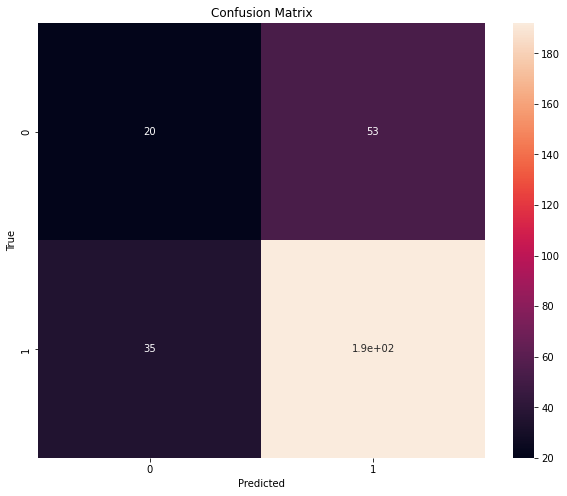

In [25]:
plt.figure(figsize = (10,8))

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.36      0.27      0.31        73
           1       0.78      0.85      0.81       227

    accuracy                           0.71       300
   macro avg       0.57      0.56      0.56       300
weighted avg       0.68      0.71      0.69       300



In [25]:
pip install opencv-python opencv-python-headless tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: opencv-python in c:\users\cflun\anaconda3\lib\site-packages (4.8.0.76)

  Using cached opencv_python_headless-4.8.0.76-cp37-abi3-win_amd64.whl (38.0 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\cflun\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [27]:
model.save('my_model.h5')

In [29]:
model = tf.keras.models.load_model('my_model.h5')  # Replace with the path to your saved model


In [30]:
cap = cv2.VideoCapture(0)  # 0 for the default webcam, you can specify a different camera index if needed


In [32]:
def preprocess_frame(frame, target_height, target_width):
    # Resize the frame to the target dimensions
    frame = cv2.resize(frame, (target_width, target_height))
    
    # Normalize pixel values to the range [0, 1]
    frame = frame.astype(np.float32) / 255.0

    # You can add more preprocessing steps here, depending on your model's requirements

    return frame


In [30]:
# Define your target dimensions
target_height = 196  # You can choose the height you want
target_width = 196   # You can choose the width you want

while True:
    ret, frame = cap.read()  # Read a frame from the webcam
    if not ret:
        break

    # Preprocess the frame (resize, normalize, etc. - similar to your training data preprocessing)
    preprocessed_frame = preprocess_frame(frame, target_height, target_width)
    preprocessed_frame = preprocessed_frame.reshape(1, target_height, target_width, 3)

    # Perform fire detection using your model
    predictions = model.predict(preprocessed_frame)

    # Check if fire is detected based on your model's output
    fire_detected = predictions > 0.5  # Adjust the threshold based on your model's output

    # Process the predictions (e.g., trigger an alarm if fire is detected)
    if fire_detected:
        # Draw a bounding box
        cv2.rectangle(frame, (50, 50), (174, 174), (0, 0, 255), 2)  # Example coordinates

        # Overlay a "Fire Detected" signal
        cv2.putText(frame, "Fire Detected", (50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Display the frame with any additional information
    cv2.imshow('Fire Detection', frame)

    # Exit the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()  # Release the webcam
cv2.destroyAllWindows()


1/1 [==============================] - 0s 72ms/step


Looking in links: https://download.pytorch.org/whl/cu111/torch_stable.html
Note: you may need to restart the kernel to use updated packages.


1/1 [==============================] - 0s 76ms/step
